In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
h = 1 #The Planck constant
m = 1 #The mass of the particle
sigma = 1 #The initial standard deviation
k = 1 #The initial momentum
a = -5 #The initial center
xl = -10 #Left boundary
xr = 10 #Right boundary
N = 10000 #The initial number of points on the spatial grid
T = 100 #Number of time steps
dt = 0.1 #The time step

In [4]:
# A useful function
def useful(t):
    return 1 + (h**2*t**2)/(4*sigma**4*m**2)

In [5]:
x = np.linspace(xl, xr, N)
one_step = np.linspace(xl, xr, N) + k/m*dt 

y_ini = np.zeros((4, x.size))
y_ini[0] = x
y_ini[1] = (useful(0.1))**(-0.25)*np.ones(x.size)

In [6]:
# Defining the directional field
def fun(x, y):
    der_x = 1/y[1]**2
    der_gamma = y[2]/y[1]**2
    der_beta = ((1/(2*sigma**2))*(1-(x-a)**2/(2*sigma**2))*(y[1]**3) -
                (1/sigma**2)*(x-a)*y[2]*(y[1]**2) - (2*m/h**2)*y[3]/y[1])
    der_alpha = -m*(y[0] - x + 2*k/m*dt) / dt**2 / y[1]**2 - 0 / y[1]**2
    return np.vstack((der_x, der_gamma, der_beta, der_alpha))

# The boundary conditions
def bc(ya, yb):
    res1 = ya[1] - (useful(2*dt))**(-0.25)
    res2 = yb[1] - (useful(2*dt))**(-0.25)
    res3 = ya[2]
    res4 = yb[2]
    # Well let's stop enforcing any kind of boundary conditions
    # res1 = 0
    # res2 = 0
    # res3 = 0
    # res4 = 0
    return np.array([res1, res2, res3, res4])

res = solve_bvp(fun, bc, x, y_ini)

<IPython.core.display.Javascript object>


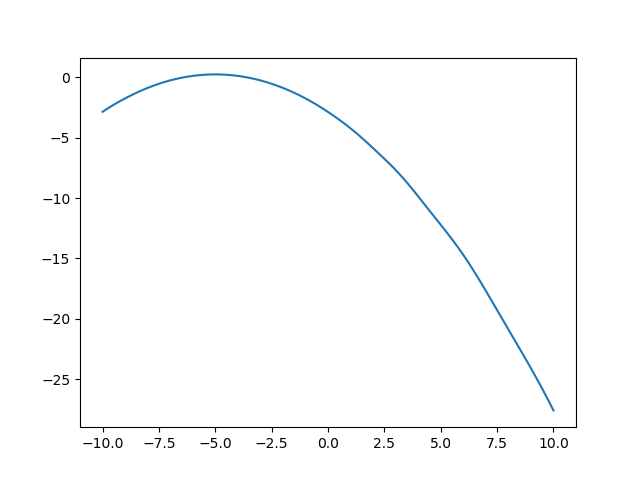

In [7]:
x_plot = np.linspace(xl, xr, 100)
y_plot = res.sol(x_plot)[3]
plt.plot(x_plot, y_plot)
plt.show()

In [8]:
y_plot

array([-2.85503430e+00, -2.60197022e+00, -2.36707641e+00, -2.14608750e+00,
       -1.93521686e+00, -1.73255319e+00, -1.53795949e+00, -1.35223214e+00,
       -1.17626954e+00, -1.01062998e+00, -8.55480460e-01, -7.10748827e-01,
       -5.76295298e-01, -4.52013287e-01, -3.37854935e-01, -2.33815007e-01,
       -1.39906028e-01, -5.61414148e-02,  1.74708861e-02,  8.09281762e-02,
        1.34230628e-01,  1.77379248e-01,  2.10374869e-01,  2.33217910e-01,
        2.45908488e-01,  2.48446579e-01,  2.40832126e-01,  2.23065082e-01,
        1.95145420e-01,  1.57073138e-01,  1.08848279e-01,  5.04709667e-02,
       -1.80585991e-02, -9.67402376e-02, -1.85574072e-01, -2.84560984e-01,
       -3.93702975e-01, -5.13002786e-01, -6.42461933e-01, -7.82076847e-01,
       -9.31834651e-01, -1.09171288e+00, -1.26168931e+00, -1.44176506e+00,
       -1.63199388e+00, -1.83249508e+00, -2.04341823e+00, -2.26484241e+00,
       -2.49663853e+00, -2.73838529e+00, -2.98945638e+00, -3.24933670e+00,
       -3.51807155e+00, -